# ML Assignment 4 – Logistic Regression, Decision Tree, KNN
## Campus Placement Prediction
### Objective
This assignment aims to develop and evaluate predictive models — Logistic Regression, Decision Tree, and K-Nearest Neighbors (KNN) — to classify students' placement status based on academic and extracurricular factors like CGPA, internships, and project involvement. By comparing these models, determine the most accurate approach for predicting student placement outcomes.

### 1. Data Preprocessing:

#### 1.1 Load the Dataset:

In [7]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/campus_placement.csv')
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [8]:
df.shape

(10000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

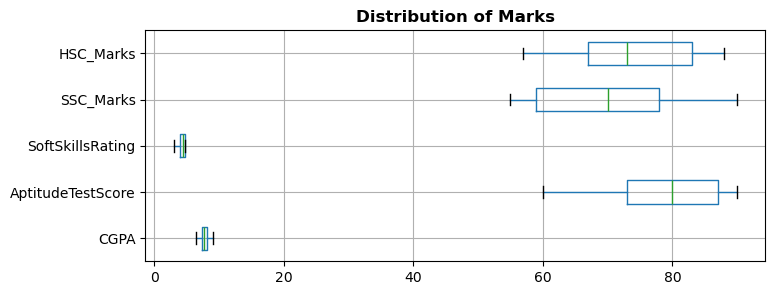

In [11]:
marks = []

for col in df.drop(columns='StudentID').columns:
    if df[col].dtype != 'object' and (df[col] > 3).any():
        marks.append(col)

df.boxplot(column=marks, figsize=(8, 3), vert=False)
plt.title('Distribution of Marks', fontweight='bold')
plt.show()

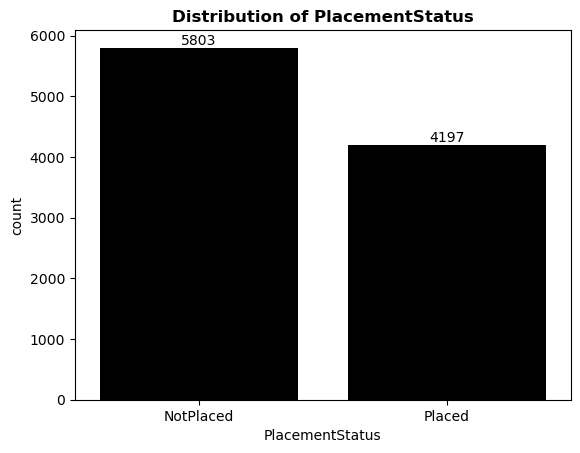

In [12]:
ax = sns.countplot(x=df['PlacementStatus'], color='black')
ax.bar_label(ax.containers[0])

plt.title('Distribution of PlacementStatus', fontweight='bold')
plt.show()

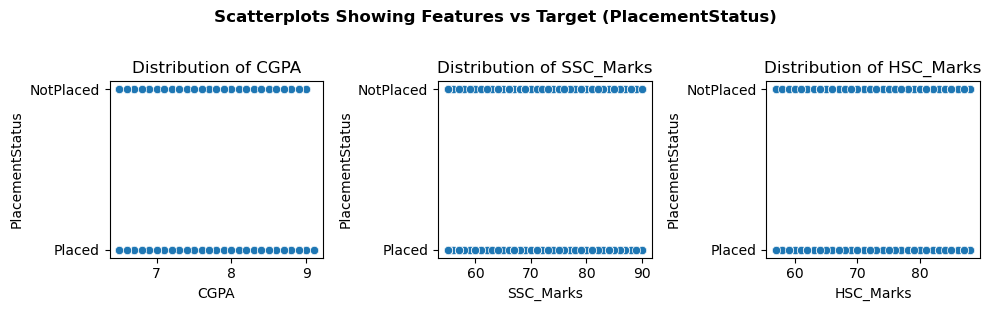

In [13]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 3))
scatter = df[['CGPA', 'SSC_Marks', 'HSC_Marks']]

for col, axis in zip(scatter.columns.to_list(), axes):
    sns.scatterplot(data=df, x=col, y='PlacementStatus', ax=axis)
    axis.set_title(f'Distribution of {col}')

plt.suptitle('Scatterplots Showing Features vs Target (PlacementStatus)', fontsize=12, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
contigency_table = pd.crosstab(df['PlacementTraining'], df['PlacementStatus'])
print("Contingency Table:")
contigency_table

Contingency Table:


PlacementStatus,NotPlaced,Placed
PlacementTraining,,
No,2264,418
Yes,3539,3779


#### Hypotheses:

**Null Hypothesis (H₀)**: The variables 'PlacementTraining' and 'PlacementStatus' are independent of each other.

**Alternative Hypothesis (H₁)**: The variables 'PlacementTraining' and 'PlacementStatus' are dependent of each other.

In [16]:
from scipy.stats import chi2_contingency

chi2_stats, p_value, dof, expected = chi2_contingency(contigency_table)

alpha = 0.05  # significance level

if p_value < alpha:
    print("The result is significant. We reject the null hypothesis.")
else:
    print("The result is not significant. We fail to reject the null hypothesis.")

The result is significant. We reject the null hypothesis.


#### Placement Analysis

- Out of the **10,000 students** in the dataset, **40%** are placed and **60%** are not placed showing significant amount of students are unplaced.

- As the BoxPlots shows that there is no presence of outliers in the `marks` attribute (`CGPA`, `AptitudeTestScore`, `SoftSkillsRating`, `SSC_Marks`, `HSC_Marks`), indicating that the **data is well-distributed and reliable for prediction**.
 
- From the scatterplots, it’s evident that many students with high `CGPA`, `SSC`, and `HSC` marks are still not placed. This suggests that **placement is not solely dependent on academic performance**. Other factors or features may play a significant role in determining whether a student gets placed.
  
- From the **Chi-Square** hypothesis testing results, We conclude that there is a statistically significant difference in the placement rates between students who underwent placement training and those who did not.

#### 1.2 Handle Missing Values:

In [19]:
for i in df.columns:
    print(i, df[i].unique(), sep='\n')

StudentID
[    1     2     3 ...  9998  9999 10000]
CGPA
[7.5 8.9 7.3 8.3 7.  7.7 6.5 7.8 7.9 7.4 8.6 8.2 6.8 7.6 6.7 8.4 8.5 6.9
 8.1 8.8 8.  6.6 7.2 7.1 8.7 9.  9.1]
Internships
[1 0 2]
Projects
[1 3 2 0]
Workshops/Certifications
[1 2 0 3]
AptitudeTestScore
[65 90 82 85 86 71 76 84 79 74 66 78 73 70 72 77 60 81 63 75 67 89 88 62
 80 68 87 69 83 64 61]
SoftSkillsRating
[4.4 4.  4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7 3.4 3.8 4.3 3.6 3.3 3.2 3.7 3.
 3.1]
ExtracurricularActivities
['No' 'Yes']
PlacementTraining
['No' 'Yes']
SSC_Marks
[61 78 79 81 74 55 62 59 75 85 82 71 84 63 72 58 77 56 68 76 64 66 60 65
 80 70 57 86 90 73 69 83 87 67 88 89]
HSC_Marks
[79 82 80 88 66 65 72 71 86 87 83 73 78 63 75 69 57 61 85 68 81 84 60 67
 64 76 70 62 74 59 58 77]
PlacementStatus
['NotPlaced' 'Placed']


#### Data Integrity Check

- Although the `df.info()` method did not indicate the presence of missing values, it is possible that there are data points labeled as **`Unknown`** or **blanks**.
  
- Therefore, checking for unique values in each column is necessary to **cross-verify** the integrity of the dataset.

- From the above data integrity check, we can conclude that there is no missing values in our dataset

#### 1.3 Encode Categorical Features: 

In [22]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='O').columns.to_list()
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [23]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int32  
 8   PlacementTraining          10000 non-null  int32  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


- Machine learning models cannot interpret **categorical columns** directly; therefore, these columns must be converted to **numerical values**.

- We used the **Label Encoding** technique to encode the categorical data for the following reasons:
  - **Memory Efficiency**: Label encoding uses less memory compared to one-hot encoding, especially when dealing with a large number of categories.
  - **Simplicity**: For models like decision trees and ensemble methods, label encoding simplifies the dataset without increasing dimensionality, making it easier for the model to learn from the data.

#### 1.4 Feature Selection: 

In [27]:
X = df.drop(columns=['StudentID', 'PlacementStatus']) # Features - Independent Variables
y = df['PlacementStatus'] # Target - Dependent Variable

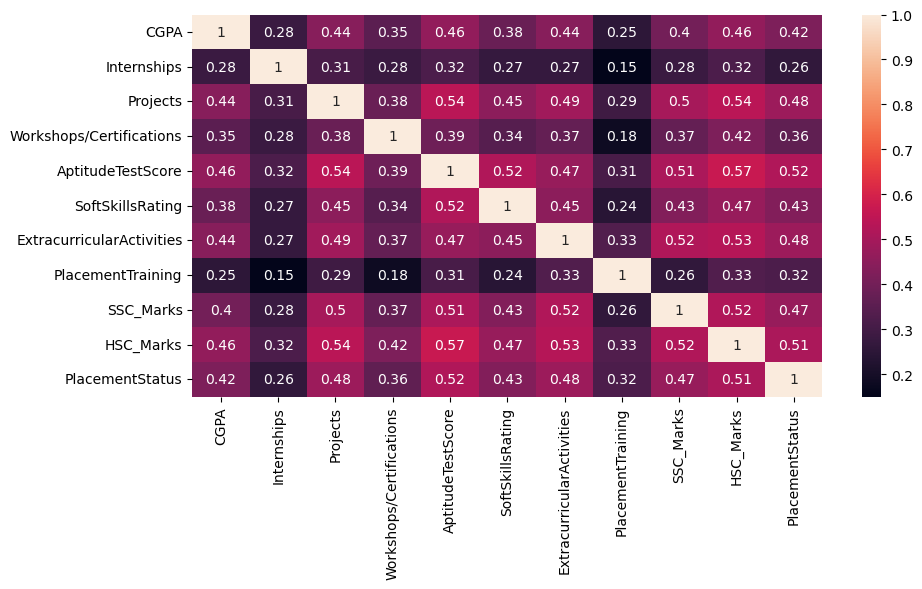

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='StudentID').corr().round(2), annot=True)
plt.tight_layout()
plt.show()

In [29]:
df.drop(columns='StudentID').corr()['PlacementStatus'].sort_values(ascending=False).iloc[1:]

AptitudeTestScore            0.521744
HSC_Marks                    0.505746
ExtracurricularActivities    0.482491
Projects                     0.475186
SSC_Marks                    0.469763
SoftSkillsRating             0.427284
CGPA                         0.423131
Workshops/Certifications     0.362268
PlacementTraining            0.323659
Internships                  0.260340
Name: PlacementStatus, dtype: float64

In [30]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest()
selector.fit_transform(X, y)
scores = selector.scores_
f_score = pd.DataFrame({'Features' : X.columns, 'Scores' : scores.round(2)}).sort_values(by='Scores', ascending=False)
f_score

,Features,Scores
4,AptitudeTestScore,3739.60
9,HSC_Marks,3436.19
6,ExtracurricularActivities,3033.77
2,Projects,2916.00
8,SSC_Marks,2831.09
5,SoftSkillsRating,2233.04
0,CGPA,2180.43
3,Workshops/Certifications,1510.33
7,PlacementTraining,1169.90
1,Internships,726.90


- We have several features, and selecting only the top features could reduce our model's accuracy. Therefore, using all available features might be a better choice to enhance accuracy.
  
- I performed feature selection methods like the correlation matrix and SelectKBest for exploration purposes, and both methods showed the same top-ranking features in the exact same order.

#### 1.5 Data Splitting:

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

#### 1.6 Feature Scaling:

In [35]:
marks

['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[marks] = scaler.fit_transform(X_train[marks]).round(3)
X_test[marks] = scaler.fit_transform(X_test[marks]).round(3)

### 2. Logistic Regression - Model Building and Evaluation:

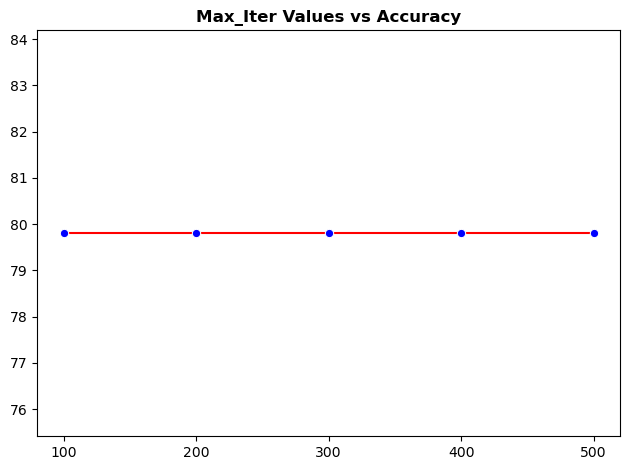

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scores = []

for iter in range(100, 501, 100):
    clf = LogisticRegression(max_iter=iter)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_pred, y_test)*100)

sns.lineplot(x=range(100, 501, 100), y=scores, marker='o', color='red', markerfacecolor='blue')
plt.title('Max_Iter Values vs Accuracy', fontweight='bold')
plt.xticks(range(100, 501, 100))
plt.tight_layout()
plt.show()

#### Reporting:

In [40]:
for sc, iv in zip(scores, range(100, 501, 100)):
    print(f'max_iter = {iv:<2}, Accuracy Score = {round(sc, 1)}')

max_iter = 100, Accuracy Score = 79.8
max_iter = 200, Accuracy Score = 79.8
max_iter = 300, Accuracy Score = 79.8
max_iter = 400, Accuracy Score = 79.8
max_iter = 500, Accuracy Score = 79.8


##### Evaluation Summary
- From the model evaluation results, it’s clear that all tested values of max_iter yield a similar accuracy score (79.8%).
  
- To maximize efficiency, setting `max_iter=100` is sufficient to reach the model's optimal accuracy of 79.8%. Increasing `max_iter` beyond 100 does not improve prediction accuracy, as the model converges quickly.

### 3. Decision Tree - Model Building and Evaluation:

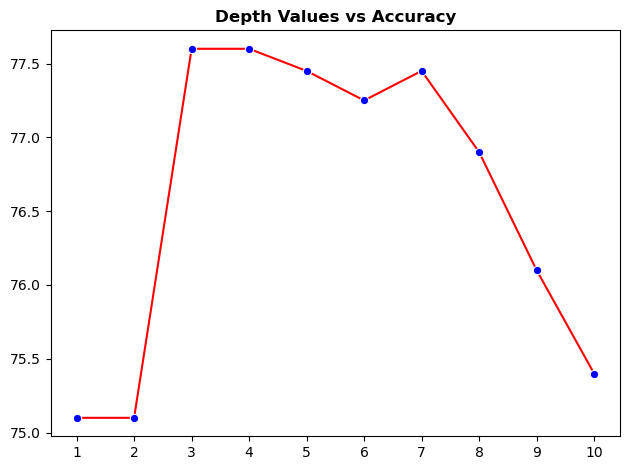

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scores = []

for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred)*100)

sns.lineplot(x=range(1, 11), y=scores, marker='o', color='red', markerfacecolor='blue')
plt.title('Depth Values vs Accuracy', fontweight='bold')
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

#### Reporting:

In [45]:
for sc, dv in zip(scores, range(1, 11)):
    print(f'max_depth = {dv:<2}, Accuracy Score = {round(sc, 1)}')

max_depth = 1 , Accuracy Score = 75.1
max_depth = 2 , Accuracy Score = 75.1
max_depth = 3 , Accuracy Score = 77.6
max_depth = 4 , Accuracy Score = 77.6
max_depth = 5 , Accuracy Score = 77.5
max_depth = 6 , Accuracy Score = 77.2
max_depth = 7 , Accuracy Score = 77.5
max_depth = 8 , Accuracy Score = 76.9
max_depth = 9 , Accuracy Score = 76.1
max_depth = 10, Accuracy Score = 75.4


##### Evaluation Summary
- **Optimal Depth**: The highest accuracy (77.6%) is achieved at `max_depth=3` and `max_depth=4`. This suggests that these depths provide a good balance between model complexity and performance.
  
- **Decreasing Accuracy**: Accuracy declines as `max_depth` increases beyond 4, with scores dropping to 76.1% at `max_depth=9` and 75.8% at `max_depth=10`. This indicates that deeper trees may lead to overfitting and are less effective in generalizing to unseen data.

### 4. K-Nearest Neighbors (KNN) - Model Building and Evaluation:

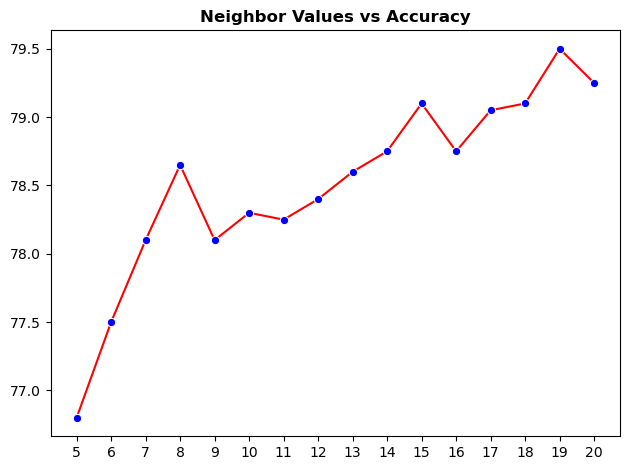

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []

for neighbor in range(5, 21):
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred)*100)

sns.lineplot(x=range(5, 21), y=scores, marker='o', color='red', markerfacecolor='blue')
plt.title('Neighbor Values vs Accuracy', fontweight='bold')
plt.xticks(range(5, 21))
plt.tight_layout()
plt.show()

#### Reporting:

In [50]:
for sc, nei in zip(scores, range(5, 21)):
    print(f'k = {nei:<2}, Accuracy Score = {round(sc, 1)}')

k = 5 , Accuracy Score = 76.8
k = 6 , Accuracy Score = 77.5
k = 7 , Accuracy Score = 78.1
k = 8 , Accuracy Score = 78.6
k = 9 , Accuracy Score = 78.1
k = 10, Accuracy Score = 78.3
k = 11, Accuracy Score = 78.2
k = 12, Accuracy Score = 78.4
k = 13, Accuracy Score = 78.6
k = 14, Accuracy Score = 78.8
k = 15, Accuracy Score = 79.1
k = 16, Accuracy Score = 78.8
k = 17, Accuracy Score = 79.0
k = 18, Accuracy Score = 79.1
k = 19, Accuracy Score = 79.5
k = 20, Accuracy Score = 79.2


##### Evaluation Summary
- While `k=8` shows a local peak in accuracy, it's not optimal to stop there since the model continues to show significant improvements up to `k=15`, gaining approximately 1% additional accuracy `(from ~78.6% to ~79.1%)`.
  
- The recommended `k-value` is `15` because it provides the best balance between accuracy and stability, before the performance starts to fluctuate which denotes overfitting.

### 5. Comparison and Analysis:

#### 5.1 Compare the accuracy scores of the three models:
- **Logistic Regression** achieved the highest accuracy score at 79.8% with `max_iter = 100`. This suggests it is the best-performing model among the three in terms of accuracy.

- **Decision Tree** with `max_depth = 3` scored 77.6%, which is lower than both Logistic Regression and KNN, indicating it might not capture as much of the data’s complexity.

- **K-Nearest Neighbors (KNN)** with `k = 15` performed slightly better than the Decision Tree at 79.1%, but it still falls short of the Logistic Regression’s accuracy.

#### 5.2 Discuss which model performed best and why, based on the accuracy scores and other relevant factors:
- **Logistic Regression** is the best model for this dataset, as it provides the highest accuracy score at 79.8%, followed by KNN with 79.1%, and finally, the Decision Tree at 77.6%.
  
- However, KNN could be reconsidered if tuning `n_neighbors` parameter further improves its performance but in our case it is unstable beyond `k=15` denotes overfitting.
  
- Decision Tree can't be used in this dataset as it shows a constant downfall in accuracy beyond `max_depth = 4` and has lower accuracy score as it compared with other models.

#### 5.3 Reflect on the strengths and weaknesses of each model in the context of this dataset:
- **Logistic Regression** is consistent and interpretable with coefficients, performing well with a stable accuracy of 79.8%, though it miss non-linear patterns.
  
- **Decision Tree** captures non-linear relationships and is easy to interpret with tree, but it plateaus at 77.6% accuracy and risks overfitting with deeper trees.
  
- **KNN** shows flexibility and competitive accuracy, but it’s computationally intensive for large datasets and requires careful scaling and tuning of `k`.